In [1]:
#age.groupby("OWNCHAR_LABEL")["OWNER_RACE_LABEL"].value_counts()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

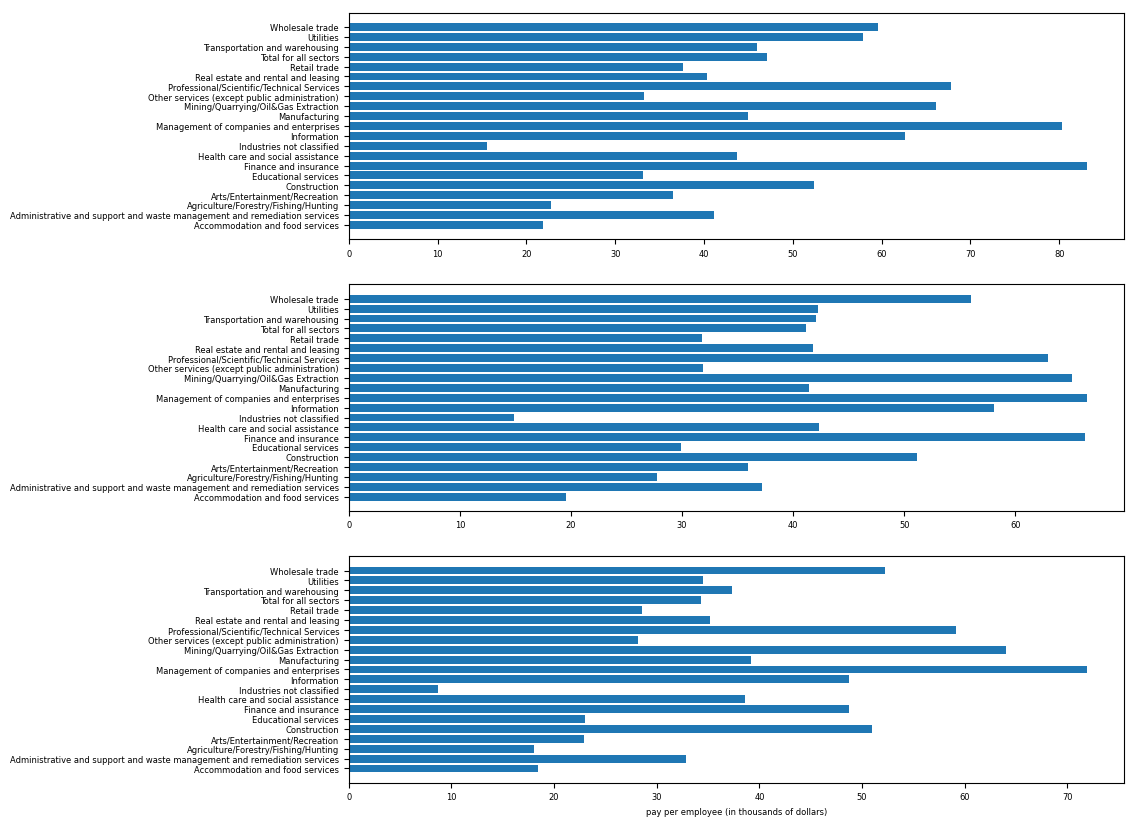

In [6]:
#read in the df
workers = pd.read_csv('CSV/business_char_workers_us.csv')

#filtering

#optional race filtering 
# races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
# workers = workers[workers.race.isin(races)]


employment = ['Contractors/subcontractors/independent contractors/outside consultants', 'Full-time paid employees', 'Part-time paid employees']
workers = workers[workers.buschar_label.isin(employment)]

workers['annual_payroll'] = workers['annual_payroll'].astype(np.int64, errors='ignore')
workers['number_of_employees'] = workers['number_of_employees'].astype(np.int64, errors='ignore')

#create a new column which shows the average pay per employee
workers['pay_per_employee'] = round(workers['annual_payroll'] / workers['number_of_employees'])

#perform an aggregtion
workers = workers.groupby(['industry', 'buschar_label']).agg(pay_per_employee=('pay_per_employee', 'mean')).unstack()

#change how the column labels are presented (tuples to string)
workers.columns = [':'.join(x) if x[1] else x[0] for x in workers.columns] 

#uncomment this line if race filtering is enabled
# workers.index = [':'.join(x) if x[1] else x[0] for x in workers.index] 

#impute nulls with row average
workers = workers.T.fillna(workers.mean(axis=1)).T

#drop empty rows
workers.dropna(inplace=True)

plt.rcParams.update({'font.size': 6})

fig, ax = plt.subplots(3, 1, figsize=(10,10))

# some trickiness to add xlabels by wrapping subplots in a larger grid
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel("pay per employee (in thousands of dollars)")


ax[0].barh(workers.index, workers['pay_per_employee:Contractors/subcontractors/independent contractors/outside consultants'])
ax[1].barh(workers.index, workers['pay_per_employee:Full-time paid employees'])
ax[2].barh(workers.index, workers['pay_per_employee:Part-time paid employees'])
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'pay_per_employee for Contractors/subcontractors/independent contractors/outside consultants'),
  Text(1.5, 0, 'pay_per_employee for Full-time paid employees'),
  Text(2.5, 0, 'pay_per_employee for Item not reported'),
  Text(3.5, 0, 'pay_per_employee for Leased employees from leasing service or professional employer organization'),
  Text(4.5, 0, 'pay_per_employee for Paid day laborers'),
  Text(5.5, 0, 'pay_per_employee for Part-time paid employees'),
  Text(6.5, 0, 'pay_per_employee for Temporary staffing obtained from a temporary help service')])

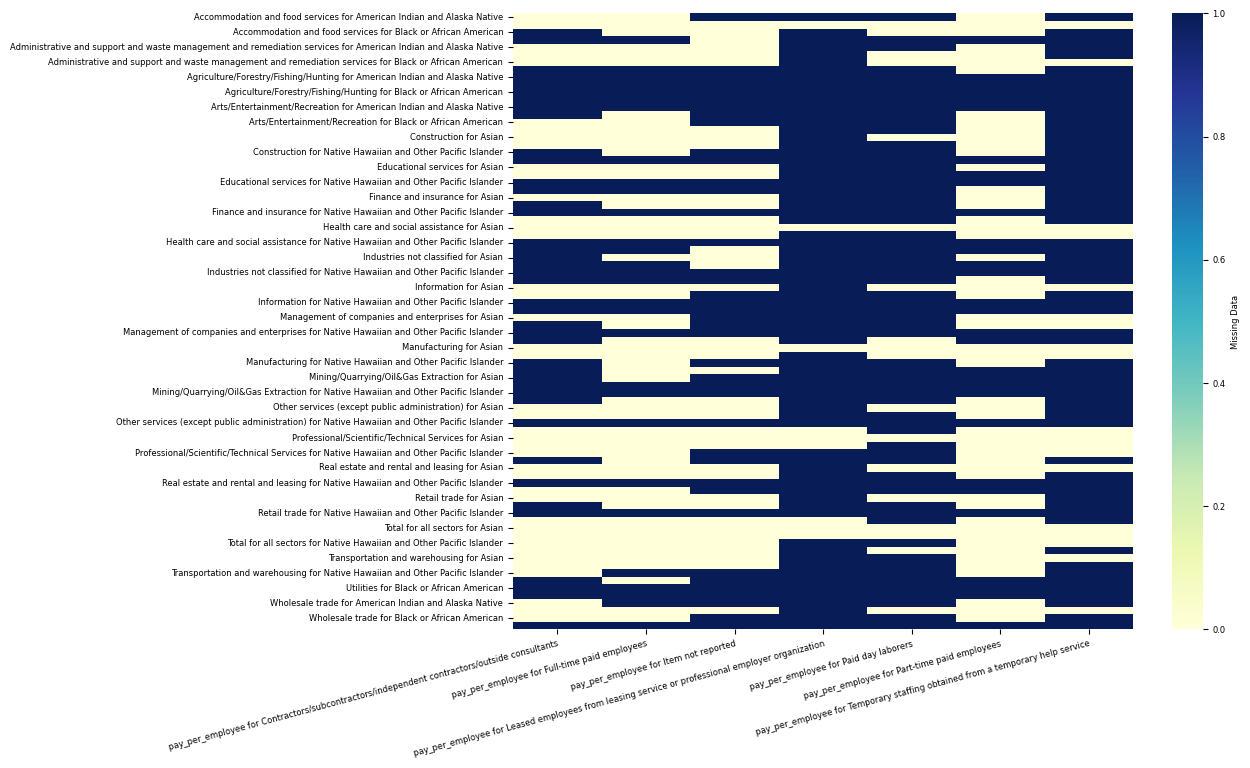

In [11]:
#read in the df
workers = pd.read_csv('CSV/business_char_workers_us.csv')

# #filtering

#optional race filtering 
races = ['Asian', 'Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
workers = workers[workers.race.isin(races)]

employment = ['All firms', 'Total reporting', 'Items not reported', 'None of the above']
workers = workers[~workers.buschar_label.isin(employment)]

workers['annual_payroll'] = workers['annual_payroll'].astype(np.int64, errors='ignore')
workers['number_of_employees'] = workers['number_of_employees'].astype(np.int64, errors='ignore')

#create a new column which shows the average pay per employee
workers['pay_per_employee'] = round(workers['annual_payroll'] / workers['number_of_employees'])

#perform an aggregtion
workers = workers.groupby(['industry', 'race', 'buschar_label']).agg(pay_per_employee=('pay_per_employee', 'mean')).unstack()

#change how the column labels are presented (tuples to string)
workers.columns = [' for '.join(x) if x[1] else x[0] for x in workers.columns] 

#run this line if race filtering is enabled
workers.index = [' for '.join(x) if x[1] else x[0] for x in workers.index] 

plt.figure(figsize=(10,8))
sns.heatmap(workers.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_Worker_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor')

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Federal government'),
  Text(1.5, 0, 'Individuals'),
  Text(2.5, 0, 'Other businesses'),
  Text(3.5, 0, 'Other organizations'),
  Text(4.5, 0, 'State and local government')])

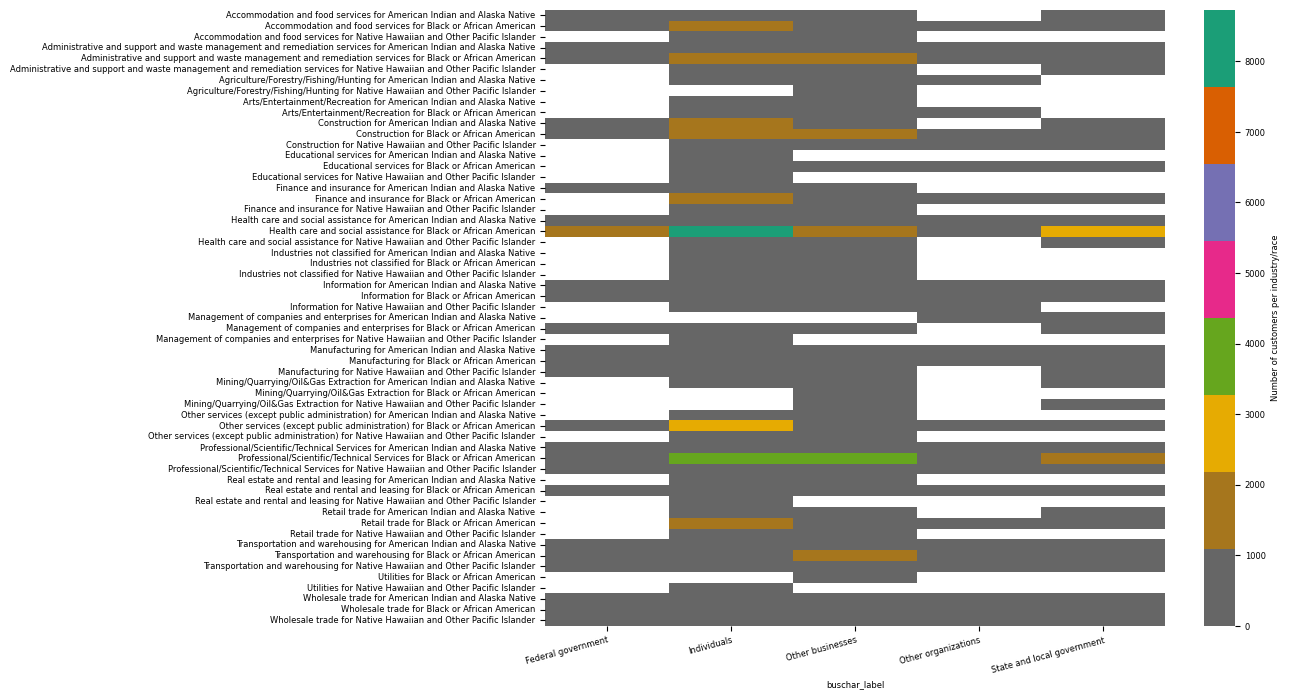

In [62]:
#read in from csv
customers = pd.read_csv('CSV/business_char_customers_us.csv')

#filtering

#race filtering is optional
races = ['Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
customers = customers[customers.race.isin(races)]

buyers = ['Individuals', 'Other businesses', 'State and local government', 'Other organizations', 'Federal government']
customers = customers[customers.buschar_label.isin(buyers)]

filtered_industries = ["Total for all sectors"]
customers = customers[~customers["industry"].isin(filtered_industries)]

#perform an aggregation
customers = customers.groupby(['industry', 'race', 'buschar_label'])['number_of_firms'].sum().unstack()

# uncomment this line if race filtering is enabled
customers.index = [' for '.join(x) if x[1] else x[0] for x in customers.index] 

#for changing the size of the text
plt.rcParams.update({'font.size': 6})

plt.figure(figsize=(10,8))
sns.heatmap(customers,
            cmap="Dark2_r",
            cbar_kws={'label': 'Number of customers per industry/race'})
plt.savefig("visualizing_Customer_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor')


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Federal government'),
  Text(1.5, 0, 'Individuals'),
  Text(2.5, 0, 'Other businesses'),
  Text(3.5, 0, 'Other organizations'),
  Text(4.5, 0, 'State and local government')])

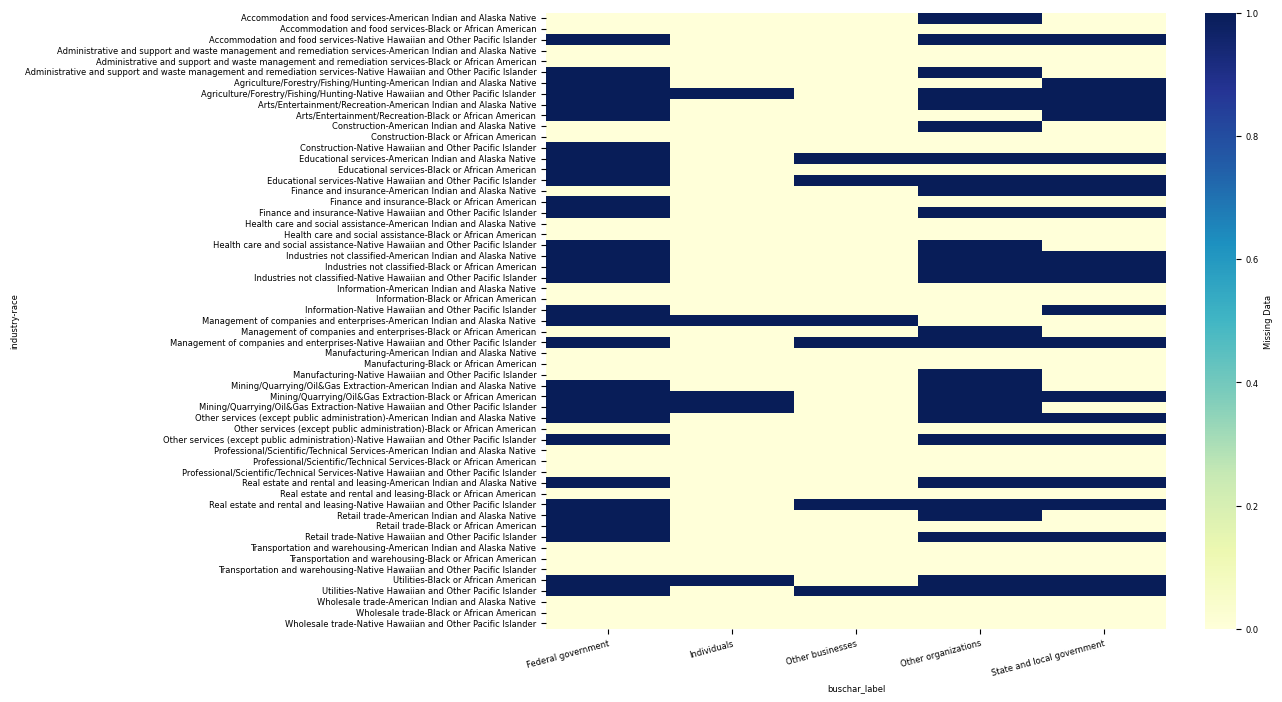

In [48]:
#read in from csv
customers = pd.read_csv('CSV/business_char_customers_us.csv')

#filtering

#race filtering is optional
races = ['Black or African American', 'American Indian and Alaska Native', 'Native Hawaiian and Other Pacific Islander']
customers = customers[customers.race.isin(races)]

buyers = ['Individuals', 'Other businesses', 'State and local government', 'Other organizations', 'Federal government']
customers = customers[customers.buschar_label.isin(buyers)]

filtered_industries = ["Total for all sectors"]
customers = customers[~customers["industry"].isin(filtered_industries)]

#perform an aggregation
customers = customers.groupby(['industry', 'race', 'buschar_label'])['number_of_firms'].sum().unstack()

plt.figure(figsize=(10,8))
sns.heatmap(customers.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_Customer_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.xticks(rotation=15, ha='right', rotation_mode='anchor')